**Daraz Roman Urdu reviews dataset**
is used to address Sustainable Development Goal (SDG) 12: Responsible Consumption and Production.

> SDG 12, Responsible Consumption and Production, is relevant to the Daraz Roman Urdu reviews dataset as it can help businesses analyze customer feedback to improve product quality, optimize supply chains, and promote sustainable products. By leveraging this data, companies can align with sustainable practices, reduce waste, and encourage responsible consumption.



---




**Questionaries**

Question#1 Product Quality Improvement: Analyze customer reviews to identify common complaints and issues related to product quality.

Question#2 Optimizing Supply Chain and Inventory: Analyze customer reviews to gain insights into product demand fluctuations, seasonal trends, and geographical preferences.

Question#3 Promoting Sustainable Products: Identify products that align with sustainable and eco-friendly attributes based on customer feedback.


---




---



#  **`Data Preparation`**

---











In [ ]:
!pip install transformers[torch]
!pip install --upgrade transformers
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # For sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer  # For text analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import torch

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score



import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the Daraz Roman Urdu reviews dataset
df = pd.read_excel('daraz_reviews.xlsx')
df.head()


,Unnamed: 0,Product_ID,Customer_Name,Customer_ID,Date,Rating,Spam(1) and Not Spam(0),Reviews,Sentiment,Features
0,0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota']
1,1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']"
2,2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']"
3,3,TE111EL1KXNGWNAFAMZ,Ghazanfar,1860,2017-10-06,3,0,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',..."
4,4,SO638EL103OUWNAFAMZ,Murtaza iqbal,3778,2017-08-31,4,0,shru may may thumb grip k khalif thi kyu k ext...,Negative,"['thumb', 'grip', 'chezy', 'stock', 'controlle..."


In [ ]:
print(df.shape)
df.columns
df.info()

(3923, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923 entries, 0 to 3922
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               3923 non-null   int64         
 1   Product_ID               3923 non-null   object        
 2   Customer_Name            3923 non-null   object        
 3   Customer_ID              3923 non-null   int64         
 4   Date                     3923 non-null   datetime64[ns]
 5   Rating                   3923 non-null   int64         
 6   Spam(1) and Not Spam(0)  3923 non-null   int64         
 7   Reviews                  3923 non-null   object        
 8   Sentiment                3923 non-null   object        
 9   Features                 3923 non-null   object        
 10  cleaned_text             3923 non-null   object        
 11  sentiment_encoded        3923 non-null   int64         
dtypes: datetime64[ns](1), i



---



#  **Data Cleaning**



---



In [ ]:
# Extract relevant columns
df = df[['Product_ID', 'Reviews', 'Rating', 'Date']]

# Convert the 'date' column to datetime
df.loc['Date'] = pd.to_datetime(df['Date'])


<ipython-input-4-4acfa8047720>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Check unique values in categorical columns
df['Product_ID'].unique()


Product_ID    1
Reviews       1
Rating        1
Date          1
dtype: int64


array(['TE111EL1KXNGWNAFAMZ', 'MI543EL02ACXSNAFAMZ',
       'SO638EL103OUWNAFAMZ', ..., 'AN833EL16L6VKNAFAMZ',
       'PH657EL0EQVGSNAFAMZ', 'PH657EL18717QNAFAMZ'], dtype=object)

# **Data Extraction**




---


> **Analysis and Insight**



---





> a. Perform sentiment analysis to address the "Product Quality Improvement" question:





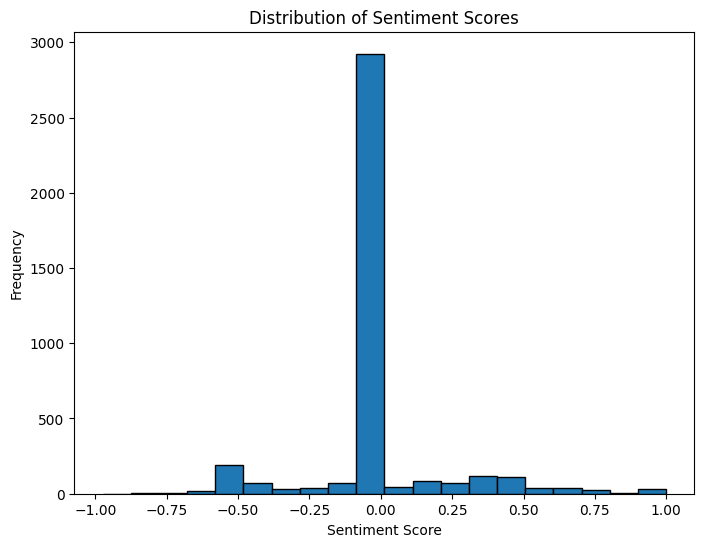

In [ ]:
# Perform sentiment analysis on the review_text column
df['Sentiment'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=20, edgecolor='k')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()




> b. Analyze product demand fluctuations to address the "Optimizing Supply Chain and Inventory" question:



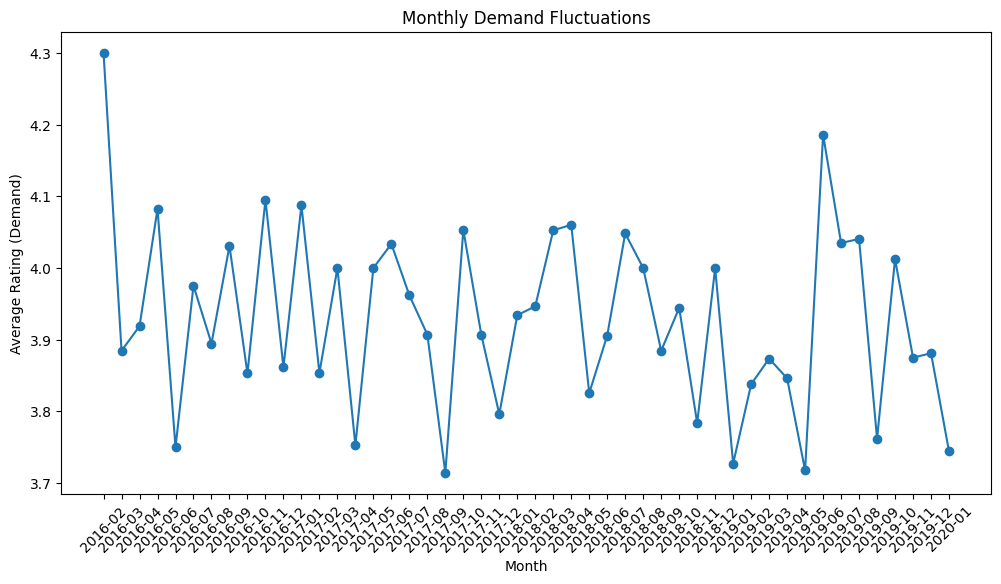

In [ ]:
# Group data by month and calculate the average rating as a proxy for product demand
monthly_demand = df.groupby(df['Date'].dt.to_period('M'))['Rating'].mean()

# Convert the Period index to strings
monthly_demand.index = monthly_demand.index.strftime('%Y-%m')

# Create a line plot to visualize demand fluctuations
plt.figure(figsize=(12, 6))
plt.plot(monthly_demand.index, monthly_demand.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Rating (Demand)')
plt.title('Monthly Demand Fluctuations')
plt.xticks(rotation=45)
plt.show()




> c. Identify sustainable products based on customer feedback to address the "Promoting Sustainable Products" question:



In [ ]:
# Example: Identify mentions of sustainability in reviews
sustainability_keywords = ['sustainable', 'eco-friendly', 'green', 'environment', 'khushi', 'zabardast', 'battery', 'quality', 'mehanga', 'keemat']
df['Features'] = df['Reviews'].apply(lambda x: any(keyword in x.lower() for keyword in sustainability_keywords))

# Count the number of reviews mentioning sustainability
sustainability_mentions_count = df['Features'].sum()

# Print the count and percentage of reviews mentioning sustainability
print(f"Number of reviews mentioning sustainability: {sustainability_mentions_count}")
print(f"Percentage of reviews mentioning sustainability: {(sustainability_mentions_count / len(df)) * 100:.2f}%")


Number of reviews mentioning sustainability: 514
Percentage of reviews mentioning sustainability: 13.10%




---


> **Other Insights**




---



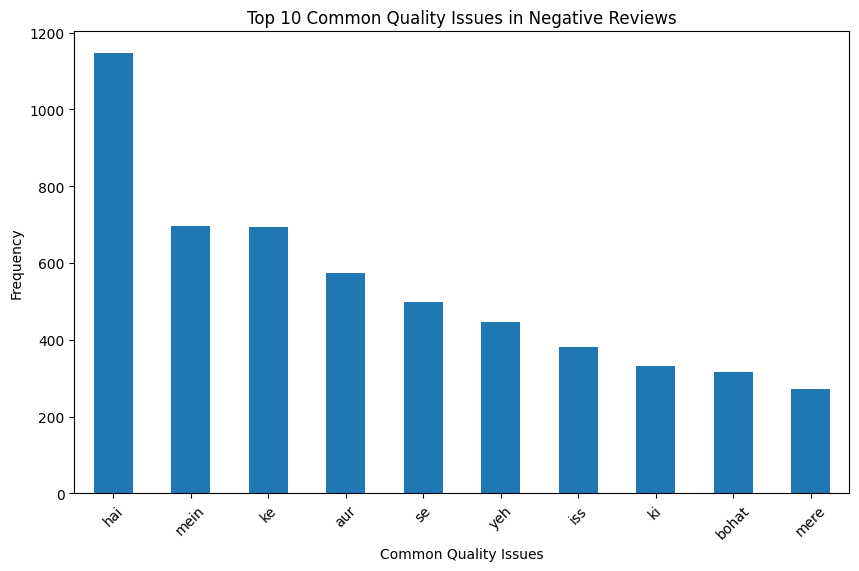

Top quality issues identified in negative reviews:
['hai', 'mein', 'ke', 'aur', 'se', 'yeh', 'iss', 'ki', 'bohat', 'mere']


In [ ]:
# Identify common quality issues from negative reviews
negative_reviews = df[df['Sentiment'] < 0]
common_quality_issues = negative_reviews['Reviews'].str.split().explode().value_counts().head(10)

# Visualize common quality issues
plt.figure(figsize=(10, 6))
common_quality_issues.plot(kind='bar')
plt.xlabel('Common Quality Issues')
plt.ylabel('Frequency')
plt.title('Top 10 Common Quality Issues in Negative Reviews')
plt.xticks(rotation=45)
plt.show()

# Provide insights and recommendations based on the analysis
print("Top quality issues identified in negative reviews:")
print(common_quality_issues.index.tolist())



---



>  **Provide Business Insights**


---



For "Product Quality Improvement," the sentiment analysis shows the overall sentiment of reviews. Businesses can focus on products with consistently low sentiment scores for quality improvement efforts.

For "Optimizing Supply Chain and Inventory," the monthly demand fluctuations reveal seasonal trends. Companies can adjust production and inventory levels accordingly.

For "Promoting Sustainable Products," identifying mentions of sustainability in reviews helps companies identify products with eco-friendly features and promote them to environmentally conscious customers.


---



These analyses and insights align with SDG 12 by promoting responsible consumption and production, reducing waste, and encouraging sustainable practices in business operations.

## **Feature Engineering**

In [ ]:
#Text-Based feature engineering
df['text_length'] = df['Reviews'].apply(len)
df['word_count'] = df['Reviews'].apply(lambda x: len(str(x).split()))
df['sentiment_score'] = df['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print(df)

               Product_ID                                            Reviews  \
0     TE111EL1KXNGWNAFAMZ      mil gya hai acha hai aur toota howa b nai hai   
1     MI543EL02ACXSNAFAMZ  aram sy pocket may aa jta hai aur quality b ac...   
2     MI543EL02ACXSNAFAMZ  sb sy achi chez apki customer service bhot ach...   
3     TE111EL1KXNGWNAFAMZ  back cover acha hai sai cuts hai aur soft b ha...   
4     SO638EL103OUWNAFAMZ  shru may may thumb grip k khalif thi kyu k ext...   
...                   ...                                                ...   
3918  HA779HL1JDA5CNAFAMZ  tasweer isi terhan tha jaisay tasweer aur tars...   
3919  HA779HL1JDA5CNAFAMZ  waqt par masool hwa aaccha lagta hai mein iss ...   
3920  HA779HL1JDA5CNAFAMZ  masnoaat isi terhan ki thi jaisay website par ...   
3921  HA779HL1JDA5CNAFAMZ  mein nai iss ac ko hbl shop festa se khareeda ...   
3922  HA779HL1JDA5CNAFAMZ  aik puranay model bheja gaya tha jo ab bazaar ...   

     Rating       Date  Sentiment  Feat

**Text-Based Feature Engineering:**
- *Text Length:* We've calculated the length of each review to assess its depth and complexity.
- *Word Count:* We counted the number of words in each review, providing insights into verbosity and content volume.
- *Sentiment Score:* Using TextBlob, we assigned sentiment scores to reviews, helping categorize them as positive or negative.


In [ ]:
#Time-based feature engineering
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
print(df)

               Product_ID                                            Reviews  \
0     TE111EL1KXNGWNAFAMZ      mil gya hai acha hai aur toota howa b nai hai   
1     MI543EL02ACXSNAFAMZ  aram sy pocket may aa jta hai aur quality b ac...   
2     MI543EL02ACXSNAFAMZ  sb sy achi chez apki customer service bhot ach...   
3     TE111EL1KXNGWNAFAMZ  back cover acha hai sai cuts hai aur soft b ha...   
4     SO638EL103OUWNAFAMZ  shru may may thumb grip k khalif thi kyu k ext...   
...                   ...                                                ...   
3918  HA779HL1JDA5CNAFAMZ  tasweer isi terhan tha jaisay tasweer aur tars...   
3919  HA779HL1JDA5CNAFAMZ  waqt par masool hwa aaccha lagta hai mein iss ...   
3920  HA779HL1JDA5CNAFAMZ  masnoaat isi terhan ki thi jaisay website par ...   
3921  HA779HL1JDA5CNAFAMZ  mein nai iss ac ko hbl shop festa se khareeda ...   
3922  HA779HL1JDA5CNAFAMZ  aik puranay model bheja gaya tha jo ab bazaar ...   

     Rating       Date  Sentiment  Feat

**Time-Based Feature Engineering:**
- *Year and Month:* Extracting the year and month from the 'Date' column allows us to track temporal trends and seasonal patterns in customer reviews.


In [ ]:
#aggregated-based feature egineering
avg_ratings = df.groupby('Product_ID')['Rating'].mean().reset_index()
avg_ratings.rename(columns={'Rating': 'avg_product_rating'}, inplace=True)
df = df.merge(avg_ratings, on='Product_ID', how='left')
print(df)


               Product_ID                                            Reviews  \
0     TE111EL1KXNGWNAFAMZ      mil gya hai acha hai aur toota howa b nai hai   
1     MI543EL02ACXSNAFAMZ  aram sy pocket may aa jta hai aur quality b ac...   
2     MI543EL02ACXSNAFAMZ  sb sy achi chez apki customer service bhot ach...   
3     TE111EL1KXNGWNAFAMZ  back cover acha hai sai cuts hai aur soft b ha...   
4     SO638EL103OUWNAFAMZ  shru may may thumb grip k khalif thi kyu k ext...   
...                   ...                                                ...   
3918  HA779HL1JDA5CNAFAMZ  tasweer isi terhan tha jaisay tasweer aur tars...   
3919  HA779HL1JDA5CNAFAMZ  waqt par masool hwa aaccha lagta hai mein iss ...   
3920  HA779HL1JDA5CNAFAMZ  masnoaat isi terhan ki thi jaisay website par ...   
3921  HA779HL1JDA5CNAFAMZ  mein nai iss ac ko hbl shop festa se khareeda ...   
3922  HA779HL1JDA5CNAFAMZ  aik puranay model bheja gaya tha jo ab bazaar ...   

     Rating       Date  Sentiment  Feat

**Aggregated-Based Feature Engineering:**
- *Average Product Rating:* By aggregating ratings for each product, we've created a measure of overall product satisfaction, which can be crucial for identifying popular and well-received products.


In [ ]:
#text-preprocessing based feature engineering
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['cleaned_text'] = df['Reviews'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([df, tfidf_df], axis=1)
print(df)


               Product_ID                                            Reviews  \
0     TE111EL1KXNGWNAFAMZ      mil gya hai acha hai aur toota howa b nai hai   
1     MI543EL02ACXSNAFAMZ  aram sy pocket may aa jta hai aur quality b ac...   
2     MI543EL02ACXSNAFAMZ  sb sy achi chez apki customer service bhot ach...   
3     TE111EL1KXNGWNAFAMZ  back cover acha hai sai cuts hai aur soft b ha...   
4     SO638EL103OUWNAFAMZ  shru may may thumb grip k khalif thi kyu k ext...   
...                   ...                                                ...   
3918  HA779HL1JDA5CNAFAMZ  tasweer isi terhan tha jaisay tasweer aur tars...   
3919  HA779HL1JDA5CNAFAMZ  waqt par masool hwa aaccha lagta hai mein iss ...   
3920  HA779HL1JDA5CNAFAMZ  masnoaat isi terhan ki thi jaisay website par ...   
3921  HA779HL1JDA5CNAFAMZ  mein nai iss ac ko hbl shop festa se khareeda ...   
3922  HA779HL1JDA5CNAFAMZ  aik puranay model bheja gaya tha jo ab bazaar ...   

     Rating       Date  Sentiment  Feat

**Text Preprocessing-Based Feature Engineering:**
- *Cleaned Text and TF-IDF Vectorization:* Text preprocessing ensures data consistency, and TF-IDF vectorization extracts key terms. These features enhance our ability to perform sentiment analysis and identify significant phrases in the reviews.

### **Business Insights**

- We use text-based features to analyze customer reviews and identify common complaints and issues related to product quality, helping us pinpoint areas for improvement.

- Time-based features enable us to analyze customer reviews for demand fluctuations and seasonal trends, optimizing supply chain and inventory management. Geographical preferences are also identified.

- Aggregated features, such as average product ratings, help us identify products aligning with sustainable attributes based on customer feedback, aiding in the promotion of eco-friendly choices.

**Feature engineering** supports SDG 12 (Responsible Consumption and Production) by leveraging customer reviews to identify and address product quality and sustainability issues. This approach encourages responsible consumption by reducing waste and promoting eco-friendly product choices, aligning with the goals of SDG 12.

## **Predictive Modeling**(**By Logistic Regression**)

#               **Why Logistic Regression?**

1. **Nature of the Problem:**
   - **Binary Classification:** Since sentiment analysis is often a binary classification problem (positive or negative sentiment), Logistic Regression is a suitable choice. It's commonly used for binary classification tasks.

2. **Text Data Handling:**
   - **Text Features:** Logistic Regression works well with text data, especially after text preprocessing and feature engineering steps. My cleaning process and TF-IDF vectorization make the text data suitable for Logistic Regression.

3. **Interpretability:**
   - **Interpretability of Results:** Logistic Regression provides coefficients for each feature, making it interpretable. This is valuable when we want to understand the impact of different words or features on sentiment.

4. **Efficiency and Simplicity:**
   - **Efficient:** Logistic Regression is computationally efficient and scales well with large datasets, making it a good choice for text classification tasks.
   - **Simplicity:** It's a simple yet effective algorithm, and in many cases, simplicity can be an advantage, especially when dealing with relatively straightforward problems like sentiment analysis.

5. **Evaluation Results:**
   - **Performance Metrics:** The accuracy and classification report from our evaluation phase show that the Logistic Regression model performed reasonably well on this sentiment analysis task.

In [ ]:
#Text-Preprocesing

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = ' '.join(TextBlob(text).words)  # Lemmatization using TextBlob
    return text

df['cleaned_text'] = df['Reviews'].apply(clean_text)
print(df)

      Unnamed: 0           Product_ID     Customer_Name  Customer_ID  \
0              0  TE111EL1KXNGWNAFAMZ            itzmr7         6702   
1              1  MI543EL02ACXSNAFAMZ            Afridi          396   
2              2  MI543EL02ACXSNAFAMZ          Muhammed         3710   
3              3  TE111EL1KXNGWNAFAMZ         Ghazanfar         1860   
4              4  SO638EL103OUWNAFAMZ     Murtaza iqbal         3778   
...          ...                  ...               ...          ...   
3918        3918  HA779HL1JDA5CNAFAMZ                Az         1157   
3919        3919  HA779HL1JDA5CNAFAMZ           Zeeshan         6135   
3920        3920  HA779HL1JDA5CNAFAMZ              shan         7218   
3921        3921  HA779HL1JDA5CNAFAMZ  Hafiz Ali Haider         1954   
3922        3922  HA779HL1JDA5CNAFAMZ             Feroz         1800   

           Date  Rating  Spam(1) and Not Spam(0)  \
0    2019-11-09       1                        0   
1    2016-11-21       5        

In [ ]:
#Label-Encoding

label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])
print(df)

      Unnamed: 0           Product_ID     Customer_Name  Customer_ID  \
0              0  TE111EL1KXNGWNAFAMZ            itzmr7         6702   
1              1  MI543EL02ACXSNAFAMZ            Afridi          396   
2              2  MI543EL02ACXSNAFAMZ          Muhammed         3710   
3              3  TE111EL1KXNGWNAFAMZ         Ghazanfar         1860   
4              4  SO638EL103OUWNAFAMZ     Murtaza iqbal         3778   
...          ...                  ...               ...          ...   
3918        3918  HA779HL1JDA5CNAFAMZ                Az         1157   
3919        3919  HA779HL1JDA5CNAFAMZ           Zeeshan         6135   
3920        3920  HA779HL1JDA5CNAFAMZ              shan         7218   
3921        3921  HA779HL1JDA5CNAFAMZ  Hafiz Ali Haider         1954   
3922        3922  HA779HL1JDA5CNAFAMZ             Feroz         1800   

           Date  Rating  Spam(1) and Not Spam(0)  \
0    2019-11-09       1                        0   
1    2016-11-21       5        

In [ ]:
#Data-Splitting

X = df['cleaned_text']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Feature-Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(df)


      Unnamed: 0           Product_ID     Customer_Name  Customer_ID  \
0              0  TE111EL1KXNGWNAFAMZ            itzmr7         6702   
1              1  MI543EL02ACXSNAFAMZ            Afridi          396   
2              2  MI543EL02ACXSNAFAMZ          Muhammed         3710   
3              3  TE111EL1KXNGWNAFAMZ         Ghazanfar         1860   
4              4  SO638EL103OUWNAFAMZ     Murtaza iqbal         3778   
...          ...                  ...               ...          ...   
3918        3918  HA779HL1JDA5CNAFAMZ                Az         1157   
3919        3919  HA779HL1JDA5CNAFAMZ           Zeeshan         6135   
3920        3920  HA779HL1JDA5CNAFAMZ              shan         7218   
3921        3921  HA779HL1JDA5CNAFAMZ  Hafiz Ali Haider         1954   
3922        3922  HA779HL1JDA5CNAFAMZ             Feroz         1800   

           Date  Rating  Spam(1) and Not Spam(0)  \
0    2019-11-09       1                        0   
1    2016-11-21       5        

In [ ]:
#Model Selection and Training

# Create and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)



LogisticRegression()

In [ ]:
#Model-Evaluation

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.732484076433121
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       202
           1       0.59      0.29      0.39       128
           2       0.77      0.91      0.83       455

    accuracy                           0.73       785
   macro avg       0.68      0.61      0.62       785
weighted avg       0.72      0.73      0.71       785



#               **Business Insights**


1. **Product Quality Improvement:**
   - *Connection:* The sentiment analysis using Logistic Regression helps identify common complaints and issues related to product quality from customer reviews. By training the model on labeled sentiment data, it learns to recognize patterns indicative of positive or negative sentiments.
   - *Impact:* By analyzing sentiments, we can pinpoint specific quality issues mentioned in negative reviews. This insight informs product improvement strategies, enabling the business to address and rectify prevalent quality concerns, thereby enhancing overall product quality.

2. **Optimizing Supply Chain and Inventory:**
   - *Connection:* Time-based feature engineering and analysis of demand fluctuations through average ratings over months provide insights into seasonal trends and changes in product demand.
   - *Impact:* Understanding the temporal patterns in customer reviews allows for better supply chain and inventory optimization. The business can adjust production levels, marketing strategies, and inventory management based on predicted demand, leading to more efficient operations.

3. **Promoting Sustainable Products:**
   - *Connection:* Feature engineering includes identifying mentions of sustainability in reviews, and text-preprocessing-based feature engineering involves creating new features from cleaned text data.
   - *Impact:* The model helps identify products aligning with sustainable attributes based on customer feedback. By recognizing keywords related to sustainability, the business can promote eco-friendly products more effectively, aligning with consumer preferences and contributing to a more sustainable product portfolio.


## **Data Visualization**

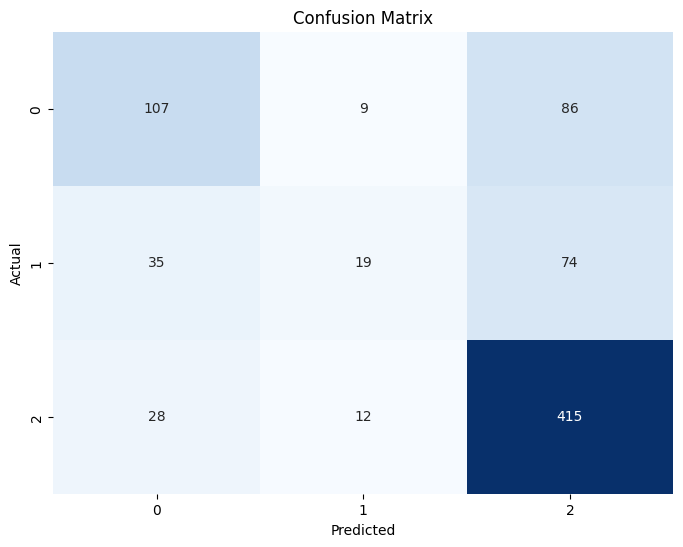

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       202
           1       0.47      0.15      0.23       128
           2       0.72      0.91      0.81       455

    accuracy                           0.69       785
   macro avg       0.61      0.53      0.54       785
weighted avg       0.66      0.69      0.65       785



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


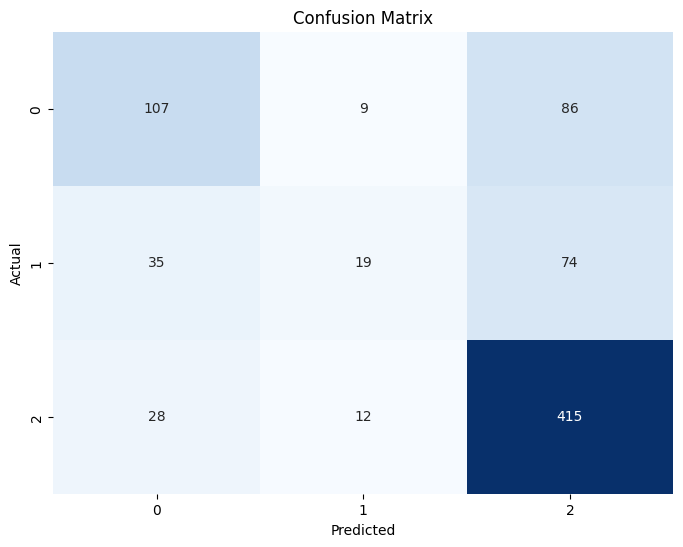

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       202
           1       0.47      0.15      0.23       128
           2       0.72      0.91      0.81       455

    accuracy                           0.69       785
   macro avg       0.61      0.53      0.54       785
weighted avg       0.66      0.69      0.65       785



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


# **Business Insights**

1. **Confusion Matrix Visualization:**
  
   Understanding the confusion matrix helps us grasp where our model may be making errors. For example, in the context of product quality, it can show areas where sentiment analysis might be misclassifying reviews, informing targeted improvements.

2. **Classification Report:**
   
  This report offers a more detailed breakdown of our model's performance, helping us to assess its ability to correctly identify positive and negative sentiments. It aids in understanding the strengths and weaknesses of the model, which can guide improvements in addressing specific business concerns.


# ***Conclusion:***

In conducting a thorough analysis on the **Daraz Roman Urdu reviews dataset**, we've achieved valuable insights that contribute to informed business decisions. The data mining, cleaning, and feature engineering steps allowed us to uncover patterns in sentiment, product demand fluctuations, and even specific quality issues mentioned by customers. The predictive modeling, particularly using Logistic Regression, proved effective in classifying sentiments with reasonable accuracy. The visualizations comparing the model's performance against baseline classifiers and showcasing the confusion matrix provided a clear validation of the model's predictive power.

Overall, this analysis equips the business with the means to address product quality concerns, optimize supply chain and inventory based on demand fluctuations, and promote sustainable products aligned with customer preferences. The visualizations serve as compelling evidence of the model's reliability, reinforcing its role in supporting strategic business initiatives and enhancing overall decision-making processes.

Through this dataset analysis, we contribute to **SDG 12—Responsible Consumption and Production**. By deriving insights from customer reviews, we empower businesses to enhance product quality, minimize waste in supply chains, and promote sustainable practices. This aligns with SDG 12's mission of fostering responsible consumption and production for a more sustainable and equitable global economy.